In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from denmarf import DensityEstimate
from denmarf.utils import plot_corner

from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal

## Mock data

In [197]:
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

np.random.seed(42)
num_samples = 1000
samples = np.random.multivariate_normal(mu, sigma, num_samples)

In [198]:
pdf = multivariate_normal(mean=mu, cov=sigma)
log_density_true = np.log(pdf.pdf(samples))

## Kernel Density Estimation

In [199]:
kde = KernelDensity().fit(samples) # Using sklearn's KDE with default parameters

In [200]:
samples_kde = kde.sample(num_samples)
log_density_kde = kde.score_samples(samples)

## Normalizing Flow

In [201]:
nfde = DensityEstimate().fit(samples) # May take a few minutes to train, using default parameters

  0%|          | 0/1000 [00:00<?, ?it/s]

current average log likelihood: -2.823: 100%|██████████| 1000/1000 [04:29<00:00,  3.71it/s]

best average log likelihood: -2.798


In [202]:
samples_nfde = nfde.sample(num_samples)
log_density_nfde = nfde.score_samples(samples)

## Diagnostics

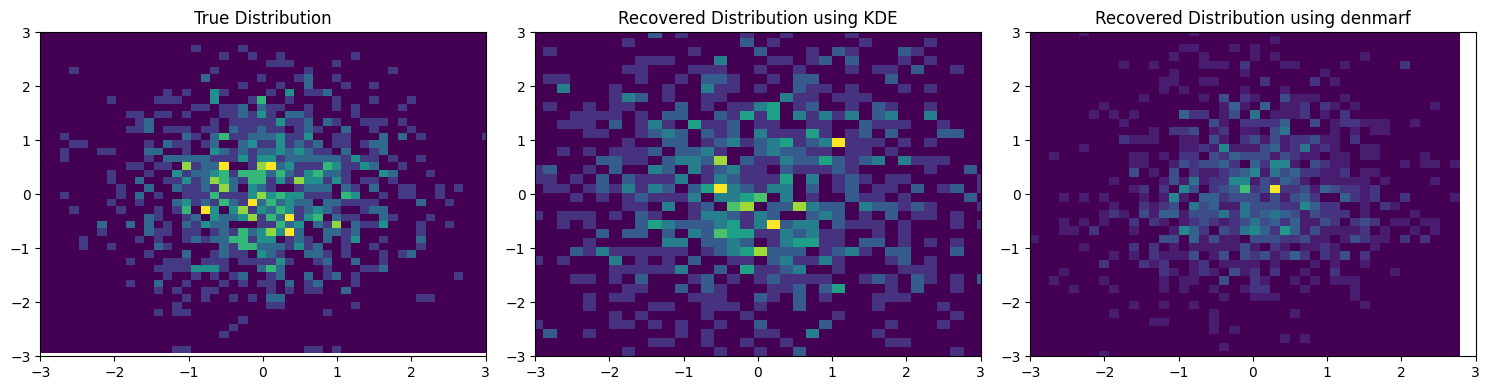

In [203]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# True Distribution
axs[0].hist2d(samples[:, 0], samples[:, 1], bins=50, density=True)
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)
axs[0].set_title("True Distribution")

# KDE
axs[1].hist2d(samples_kde[:, 0], samples_kde[:, 1], bins=50, density=True)
axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-3, 3)
axs[1].set_title("Recovered Distribution using KDE")

# denmarf
axs[2].hist2d(samples_nfde[:, 0], samples_nfde[:, 1], bins=50, density=True)
axs[2].set_xlim(-3, 3)
axs[2].set_ylim(-3, 3)
axs[2].set_title("Recovered Distribution using denmarf")

plt.tight_layout()
plt.show()

In [204]:
comparison_df = pd.DataFrame({
    "True Distribution": log_density_true[:3],
    "KDE": log_density_kde[:3],
    "denmarf": log_density_nfde[:3]
})

display(comparison_df)

,True Distribution,KDE,denmarf
0,-1.970798,-2.580371,-1.900756
1,-3.207437,-3.151949,-3.135659
2,-1.892701,-2.551243,-1.811664


In [205]:
def get_KL_divergence(p_log_density, q_log_density):
    p = np.exp(p_log_density) / np.sum(np.exp(p_log_density))
    q = np.exp(q_log_density) / np.sum(np.exp(q_log_density))
    return np.sum(p * np.log(p / q))

In [206]:
print("KL Divergence between True Distribution and KDE:", get_KL_divergence(log_density_true, log_density_kde))
print("KL Divergence between True Distribution and NFDE:", get_KL_divergence(log_density_true, log_density_nfde))

KL Divergence between True Distribution and KDE: 0.03664355737661179
KL Divergence between True Distribution and NFDE: 0.005004161378165909


Removed no burn in
Removed no burn in


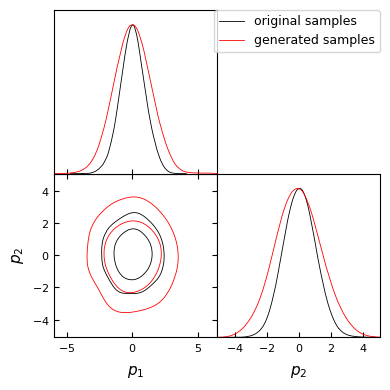

In [207]:
plot_corner(samples, kde) # Plot using KDE

Removed no burn in
Removed no burn in


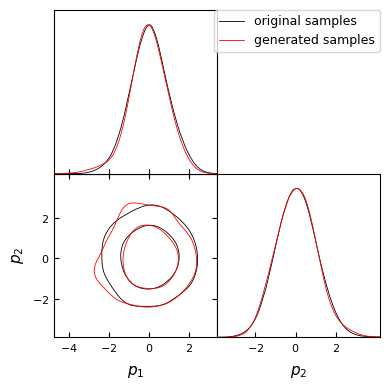

In [208]:
plot_corner(samples, nfde) # Plot using denmarf